In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spectra

data = np.load('lower11.npz')['data']


data.shape = (2,-1)
print(data.shape)
data = data[0] + 1j*data[1]
data.shape = (-1,16000)

vs = np.fft.fft(data,axis = 1)
ps = np.abs(vs)**2
ps_avg = np.mean(ps,axis=0)


(2, 1584000)


## Plotting the Average Power Spectra (Lower and Upper Sideband Observations)

### Lowers:

In [2]:
'''This cell (as well as 'Uppers') loads our data blocks from Pico. Then it puts these into a single complex array, 
with each row corresponding to a different data block. It finally takes the average power value for each frequency, 
and puts these into a final 'average' array'''

import numpy as np
import matplotlib.pyplot as plt
freqs = np.fft.fftfreq(16000)
nfiles=10
all_blocks = np.zeros(((nfiles-1)*1000,16000))
for i in range (1,nfiles):
    data = np.load('lowerr'+str(i)+'.npz')['data']
    data.shape = (2,-1)
    
    data = data[0] + 1j*data[1]
    data.shape = (-1,16000)

    vs = np.fft.fft(data,axis = 1)
    ps = np.abs(vs)**2
    
    all_blocks[(i-1)*1000:(i)*1000,:] = ps
    
    
averagesl = np.mean(all_blocks,axis=0)
    
    

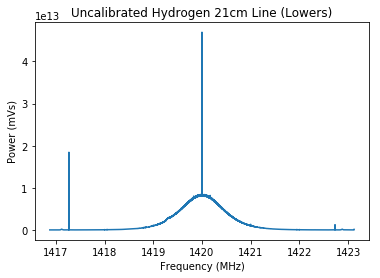

In [3]:
#matplotlib.rcParams['font.family'] = 'Times New Roman'


plt.plot(np.fft.fftshift(freqs)*-6.25+190+1230,np.fft.fftshift(averagesl))
#plt.xlim(5100,5500)
plt.title('Uncalibrated Hydrogen 21cm Line (Lowers)')
#plt.ylim(0.2e12,.45e12)
plt.savefig('Lower Hydrogen Line')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (mVs)')
#plt.xlim(1418.75,1421.25)
#plt.ylim(0,5500)
plt.show()

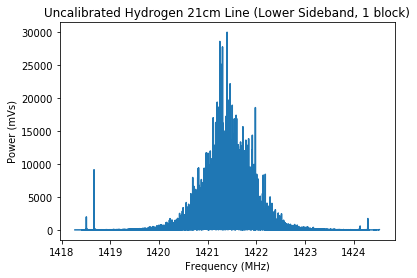

<Figure size 432x288 with 0 Axes>

In [4]:
convu = all_blocks[0,:]*100/((6.25*10**6)*2**15)
#%matplotlib notebook
#matplotlib.rcParams['font.family'] = 'Times New Roman'
plt.plot(np.fft.fftshift(freqs)*-6.25+191.4+1230,np.fft.fftshift(convu))
plt.title('Uncalibrated Hydrogen 21cm Line (Lower Sideband, 1 block)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (mVs)')
plt.savefig('Upper H line')
#plt.xlim(1418.25,1420.5)
#plt.ylim(0,5500)
#plt.ylim(0.2e12,.45e12)
plt.show()
plt.savefig('Lower_one_block.pdf')

# Figure 3:

<IPython.core.display.Javascript object>


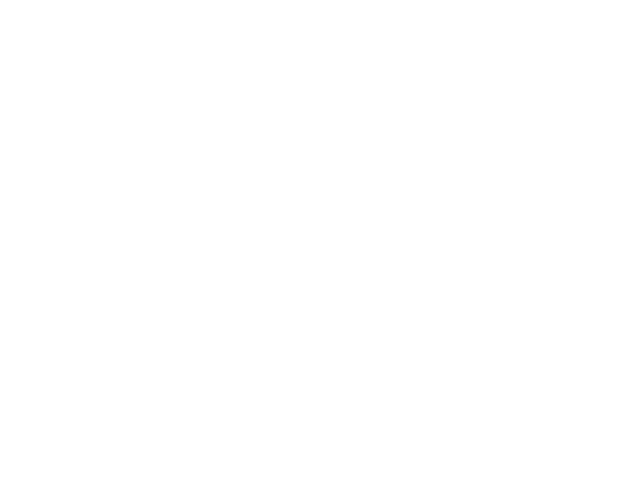

In [5]:
import matplotlib
convl = averagesl*100/((6.25*10**6)*2**15)

%matplotlib notebook
matplotlib.rcParams['font.family'] = 'Times New Roman'
f = np.fft.fftshift(freqs)
plt.plot(f*-6.25+191.4+1230,np.fft.fftshift(convl))
#plt.xlim(5100,5500)
plt.title('Uncalibrated Hydrogen 21cm Line (Lower Sideband)')
#plt.ylim(0.2e12,.45e12)
plt.savefig('Lower Hydrogen Line')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (mVs)')
plt.xlim(1420,1422.75)
plt.ylim(0,5500)
plt.text(1420.8,1225,'Possible Hydrogen Line')
plt.plot(1420.73,1270,'*',markersize=10)
plt.show()
plt.savefig('Lower_Averaged.pdf')

## Uppers:

In [6]:
'''This cell takes the power spectrum for each block (ps), and puts them into 
an array (all_blocks). Then, it averages the power spectra to produce a final upper power spectrum'''
import numpy as np
import matplotlib.pyplot as plt
nfiles=10
all_blocks = np.zeros(((nfiles-1)*1000,16000))
for i in range (1,nfiles):
    data = np.load('_upper'+str(i)+'.npz')['data']
    data.shape = (2,-1)
    
    data = data[0] + 1j*data[1]
    data.shape = (-1,16000)

    vs = np.fft.fft(data,axis = 1)
    ps = np.abs(vs)**2
    
    all_blocks[(i-1)*1000:(i)*1000,:] = ps
    
    
averagesu = np.mean(all_blocks,axis=0)
    
    

# Figure 4:

<IPython.core.display.Javascript object>


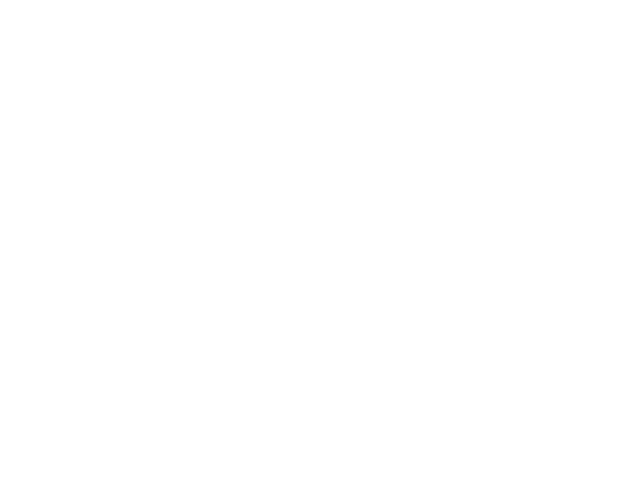

In [7]:
''' This plots the averaged power spectrum for the upper sideband measurement'''
convu = averagesu*100/((6.25*10**6)*2**15)
%matplotlib notebook
matplotlib.rcParams['font.family'] = 'Times New Roman'
plt.plot(np.fft.fftshift(freqs)*-6.25+189.4+1230,np.fft.fftshift(convu))
plt.title('Uncalibrated Hydrogen 21cm Line (Upper Sideband)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (mVs)')
plt.savefig('Upper H line')
plt.xlim(1418.25,1420.5)
plt.ylim(0,5500)
plt.text(1419.4,1280,'Possible Hydrogen Line')
plt.plot(1420.07,1375,'*',markersize=10)
#plt.ylim(0.2e12,.45e12)
plt.show()
plt.savefig('Upper.pdf')

In [8]:
'''Below follows the same procedure as for Figures 3 and 4. However, this time, we process 
the data collected when pointing at galactic coords (120,0)'''

'Below follows the same procedure as for Figures 3 and 4. However, this time, we process \nthe data collected when pointing at galactic coords (120,0)'

In [9]:
import numpy as np
import matplotlib.pyplot as plt
nfiles=10
all_blocks = np.zeros(((nfiles-1)*1000,16000))
for i in range (1,nfiles):
    data = np.load('GALACTIC'+str(i)+'.npz')['data']
    data.shape = (2,-1)
    
    data = data[0] + 1j*data[1]
    data.shape = (-1,16000)

    vs = np.fft.fft(data,axis = 1)
    ps = np.abs(vs)**2
    
    all_blocks[(i-1)*1000:(i)*1000,:] = ps
    
    
averagesg = np.mean(all_blocks,axis=0)
    
    

<IPython.core.display.Javascript object>


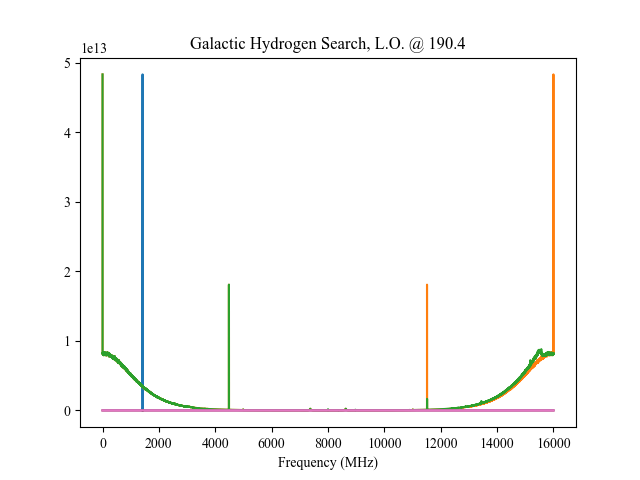

In [10]:
'''We plot the galactic hydrogen line observation:'''
%matplotlib notebook
f = np.fft.fftshift(freqs)
plt.plot(f*-(62.5/7)+190+1230,np.fft.fftshift(averagesg))
#plt.xlim(5100,5500)
plt.title('Galactic Hydrogen Search, L.O. @ 190.4')
plt.xlabel('Frequency (MHz)')
plt.savefig('Galactic Uncalibrated')
#plt.ylim(0.2e12,.45e12)
plt.show()

# Get the Line Shape

In [46]:
'''This gets the online (s_on) and offline (s_off) spectra for our galactic hydrogen observation'''
s_on = averagesg

s_off = np.empty((16000))
for i in range (len(s_on)//2,len(s_on)):
    s_off[len(s_on)-i-1] = s_on[len(s_on)-i-1]
for j in range (0,len(s_on)//2):
    s_off[len(s_on)-j-1] = s_on[j-1]
print(len(s_off)) 

16000


In [12]:
s_off

array([4.83284169e+13, 8.16144011e+12, 8.25823221e+12, ...,
       8.16144011e+12, 4.83284169e+13, 8.26440924e+12])

In [13]:
print(s_off)

[4.83284169e+13 8.16144011e+12 8.25823221e+12 ... 8.16144011e+12
 4.83284169e+13 8.26440924e+12]


In [14]:
plt.plot(s_off)
plt.plot(averagesg)

In [15]:
s_line = averagesg/s_off


In [16]:
print(s_line)

[1.         1.         1.         ... 0.99091125 0.16727201 1.        ]


In [17]:
plt.plot(np.fft.fftshift(s_line))
#plt.plot(np.fft.fftshift(averagesg))
plt.show()

In [18]:
s_line = averagesg/s_off
plt.plot(np.fft.fftshift(s_line))
plt.show()

## Get the line intensity

In [19]:
s_cold = np.abs(np.fft.fft(np.loadtxt('ColdSky0')))
s_cal = np.abs(np.fft.fft(np.loadtxt('humans0')))
T_cal = 310.15
T_cold = 2.73
G = (T_cal-T_cold)*np.sum(s_cold)/(np.sum(s_cal-s_cold))
print(G)

489.3580495964705


In [20]:
s_line = averagesg/s_off
plt.plot(np.fft.fftshift(freqs)*6.25+1430.4,G*np.fft.fftshift(s_line))
#plt.ylim(470,650)
#plt.xlim(1429.6,1430.4)
plt.show()

In [21]:
T_line = s_line*G

In [22]:
plt.plot(np.arange(0,len(T_line)), T_line)
plt.show()

# Smoothing Our Power Spectra

In [51]:
'''This gets the online (s_on) and offline (s_off) spectra for our galactic hydrogen observation'''
s_on = averagesg

s_off = np.empty((16000))
for i in range (len(s_on)//2,len(s_on)):
    s_off[len(s_on)-i-1] = s_on[len(s_on)-i-1]
for j in range (0,len(s_on)//2):
    s_off[len(s_on)-j-1] = s_on[j-1]
print(len(s_off)) 

16000


In [52]:
import DataAnalysis
d = DataAnalysis.smooth(s_on,s_off,freqs,30)

<IPython.core.display.Javascript object>


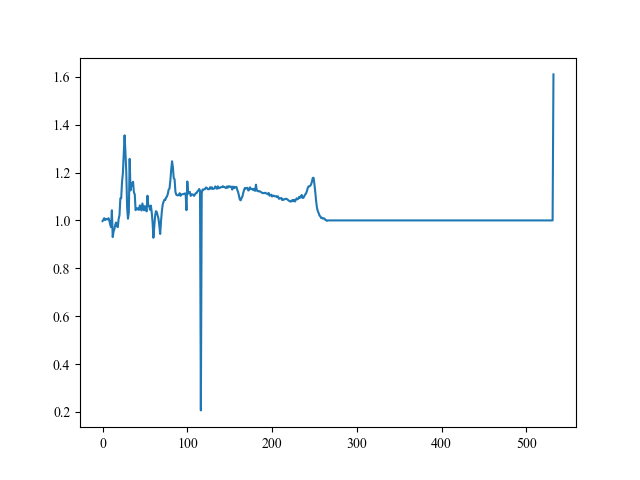

In [56]:
sm_on = d[1]
sm_off = d[2]
plt.plot(np.fft.fftshift(np.array(d[1])/np.array(d[2])))

<IPython.core.display.Javascript object>


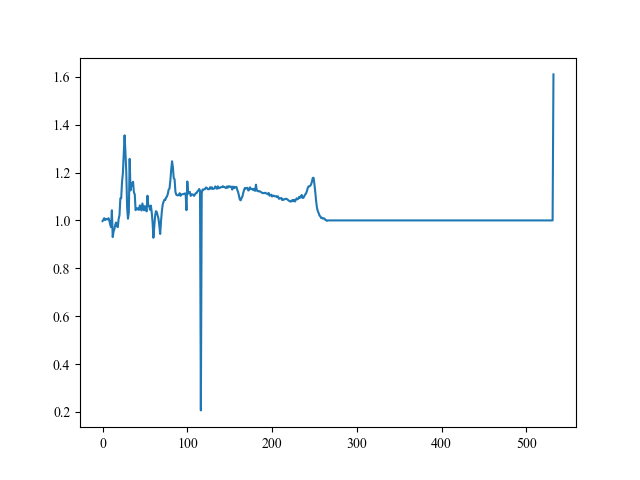

In [58]:
plt.plot(np.fft.fftshift(np.array(sm_on)/np.array(sm_off)))

<IPython.core.display.Javascript object>


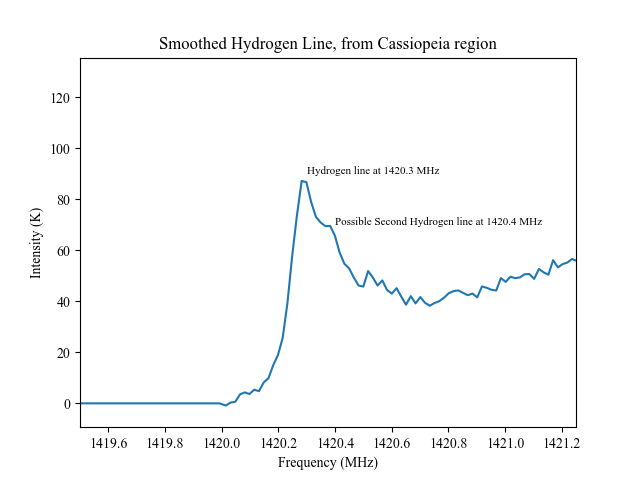

In [59]:
sm_line = np.array(sm_on)/np.array(sm_off)

plt.plot(np.fft.fftshift(freqs_sm)*(-62.5/7)+1420,np.fft.fftshift(sm_line)*G-G)
plt.title('Smoothed Hydrogen Line, from Cassiopeia region')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Intensity (K)')
plt.text(1420.3, 90, r'Hydrogen line at 1420.3 MHz', fontsize=8)
plt.text(1420.4, 70, r'Possible Second Hydrogen line at 1420.4 MHz', fontsize=8)
plt.ylim(480-G,625-G)
plt.xlim(1419.5, 1421.25)
plt.savefig('SmoothedGalactic.pdf')

# Figure 2 (USB attempt):

<IPython.core.display.Javascript object>


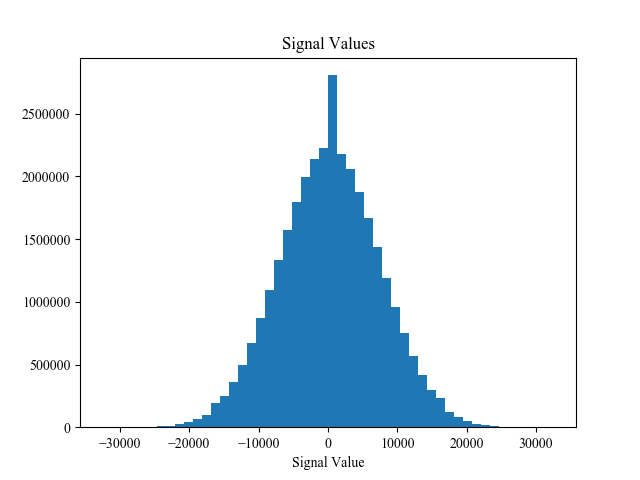

Text(0.5,0,'Signal Value')

In [61]:
import matplotlib
histogram = np.load('_upper0.npz')['data']#(100/(2**15))
matplotlib.rcParams['font.family'] = 'Times New Roman'
plt.hist(histogram,bins=50)
plt.title('Signal Values')
plt.xlabel('Signal Value')


In [62]:
a = []
for i in range (0,len(histogram)):
    a.append(histogram[i]*100/(2**15))


KeyboardInterrupt: 

In [ ]:
#w = np.load('histogram.npz')['data']
plt.hist(a,bins=50, density=True)
plt.title('Signal Values')
plt.xlabel('Signal Value (milliVolts)')
#plt.yaxis('off')
plt.savefig('SignalHistogram.pdf')

In [ ]:
#DOPPLER CORRECTION -16698.401 m/s

<IPython.core.display.Javascript object>


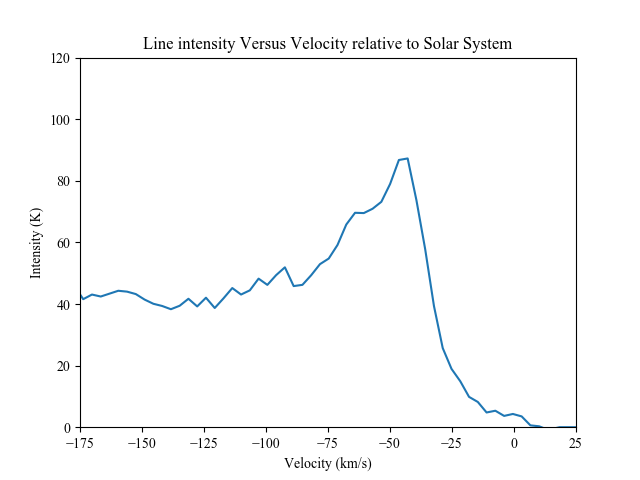

In [63]:
sm_line = np.array(sm_on)/np.array(sm_off)
Velocity = ((3*10**8)*(np.fft.fftshift(freqs_sm)*(62.5/7))/1420.4+16698.401)/1000
np.savez('Velocity.npz',data='data')

Power = np.fft.fftshift(sm_line)*G-G
np.savez('Power.npz',data='data')

plt.plot(Velocity,Power)
plt.title('Line intensity Versus Velocity relative to Solar System')
plt.xlabel('Velocity (km/s)')
plt.ylabel('Intensity (K)')
#plt.text(1420.3, 90, r'Hydrogen line at 1420.3 MHz', fontsize=8)
#plt.text(1420.4, 70, r'Possible Second Hydrogen line at 1420.4 MHz', fontsize=8)
plt.ylim(0,120)
plt.xlim(-175, 25)
plt.savefig('SmoothedGalactic_Velocity.pdf')

In [64]:
v = []
p = []
for i in range (0,len(Velocity)):
    if (Velocity[i] >-200) and (Velocity[i]<25):
        v.append(Velocity[i])
        p.append(Power[i])

np.savez('V',v=v)
np.savez('P',p=p)

In [66]:
r = np.load('V.npz')['v']

In [67]:
vel = np.load('V.npz')['v']
signal = np.load('P.npz')['p']

# Figure 6

<IPython.core.display.Javascript object>


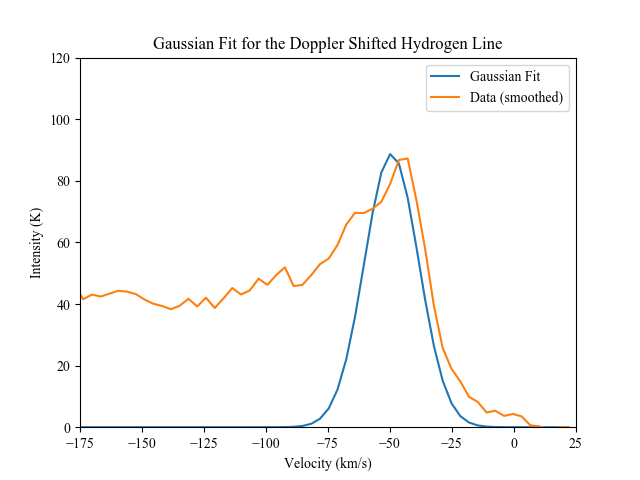

In [69]:
fit = np.load('Gauss.npz')['y']
plt.plot(vel,fit,label = "Gaussian Fit")
plt.plot(vel,signal,label = "Data (smoothed)")
plt.title('Gaussian Fit for the Doppler Shifted Hydrogen Line')
plt.xlabel('Velocity (km/s)')
plt.ylabel('Intensity (K)')
#plt.text(1420.3, 90, r'Hydrogen line at 1420.3 MHz', fontsize=8)
#plt.text(1420.4, 70, r'Possible Second Hydrogen line at 1420.4 MHz', fontsize=8)
plt.ylim(0,120)
plt.xlim(-175, 25)
plt.legend()
plt.savefig('dopplercorrection.pdf')
#plt.savefig('SmoothedGalactic_Velocity.pdf')
#Gauss: avg = -49.36
#       sig = 10.95
#       amp = 1.10*10**-8